## 1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.

In [2]:
#Se cargan todas las librerias necesarias
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import plotly.graph_objs as go 
import plotly.express as px 
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import warnings
warnings.filterwarnings('ignore')

In [11]:
#Cargar los datos
Datos = pd.read_csv('Mall_Customers.csv')

In [13]:
#Inspeccionar los datos
Datos.head(20)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [10]:
# Descripción de los datos
Datos.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

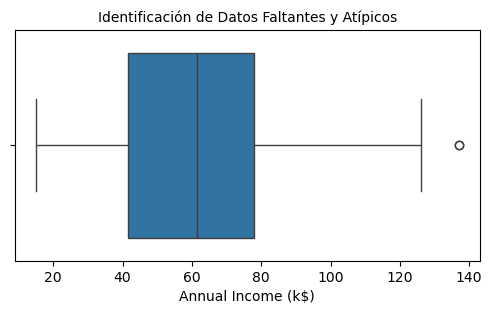

In [14]:
#Identificación de Datos Faltantes y Atípicos
plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['Annual Income (k$)'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

## 2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario

In [16]:
#Revisión de datos faltantes
print("Cantidad de Registros con cero en Edad: ",Datos['Age'].isin([0]).sum())
print("Cantidad de Registros con cero en Salario: ",Datos['Annual Income (k$)'].isin([0]).sum())
print("Cantidad de Registros con cero en Data Credito: ",Datos['Spending Score (1-100)'].isin([0]).sum())

Cantidad de Registros con cero en Edad:  0
Cantidad de Registros con cero en Salario:  0
Cantidad de Registros con cero en Data Credito:  0


In [22]:
# Reemplazar todos los ceros con el valor medio (promedio) de la columna.
Datos['Spending Score (1-100)']=Datos['Spending Score (1-100)'].replace(0,Datos['Spending Score (1-100)'].mean())

Text(0.5, 1.0, 'Identificación de Datos Atípicos')

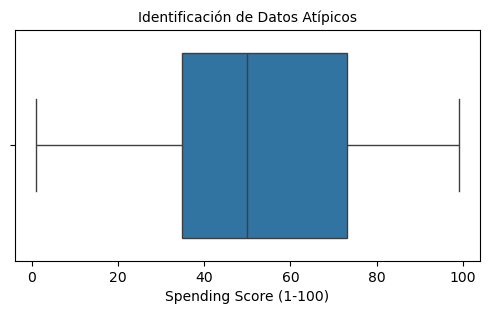

In [24]:
#Identificación de Datos Atípicos
plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['Spending Score (1-100)'])
plt.title('Identificación de Datos Atípicos', fontsize=10 )

In [26]:
#Conteo de Datos Atípicos
nivel_minimo=0
nivel_maximo=100
Total_Atipicos=((Datos['Spending Score (1-100)']<nivel_minimo)|(Datos['Spending Score (1-100)']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 0


In [28]:
# Filtramos los Datos Atípicos
Datos=Datos[(Datos['Spending Score (1-100)']<nivel_maximo)&(Datos['Spending Score (1-100)']>nivel_minimo)]

In [30]:
#Revisión del tipo de datos y datos faltantes
Datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


## 3.Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características

In [15]:
# Filtramos las columnas del modelo 
Datos = Datos[["Age","Annual Income (k$)","Spending Score (1-100)"]]

In [17]:
# Revisión de los datos
Datos.head(10)

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
5,22,17,76
6,35,18,6
7,23,18,94
8,64,19,3
9,30,19,72


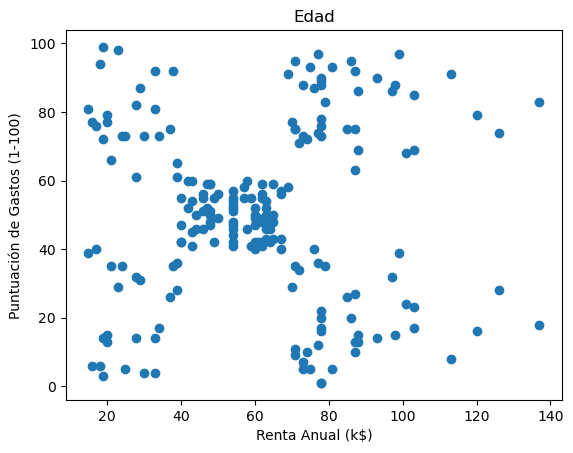

In [21]:
# Representación grafica previa al agrupamiento
plt.scatter(Datos['Annual Income (k$)'], Datos['Spending Score (1-100)'])
plt.xlabel('Renta Anual (k$)')
plt.ylabel('Puntuación de Gastos (1-100)')
plt.title('Edad')
plt.show()

## 4. Entrenar el modelo configurando los diferentes hiperparámetros

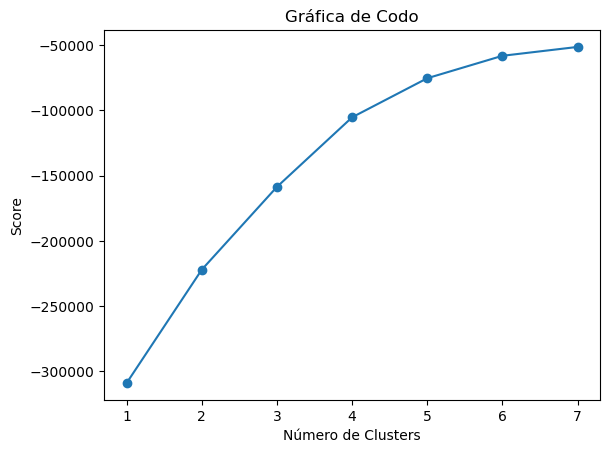

In [23]:
#Realización de la gráfica de codo para poder identificar valor de K
Nc = range(1, 8)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(Datos).score(Datos) for i in range(len(kmeans))]
score
plt.plot(Nc,score, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Score')
plt.title('Gráfica de Codo')
plt.show()

In [27]:
# Generación del modelo de Agrupamiento del modelo con K=3
Modelo = KMeans(n_clusters=3, random_state=0)
Modelo.fit(Datos)

KMeans(n_clusters=3, random_state=0)

In [29]:
#Se agrega la columna Grupo a la BD para identificar el número de grupo del agrupamiento
Modelo.labels_
Datos["Grupo"] = Modelo.labels_ 
print (Datos)

     Age  Annual Income (k$)  Spending Score (1-100)  Grupo
0     19                  15                      39      2
1     21                  15                      81      2
2     20                  16                       6      2
3     23                  16                      77      2
4     31                  17                      40      2
..   ...                 ...                     ...    ...
195   35                 120                      79      1
196   45                 126                      28      0
197   32                 126                      74      1
198   32                 137                      18      0
199   30                 137                      83      1

[200 rows x 4 columns]


## 5. Evaluar el desempeño del modelo con métricas como Coeficiente de Silhouette, Índice de Calinski-Harabasz, etc

In [31]:
#Preparación de la metrica de la columna Grupo
Observaciones = len(Datos)
X = Datos.drop('Grupo', axis=1)
clusters = Datos['Grupo']

#Procedemos a calcular las métricas
sil_score = silhouette_score(X, clusters)
calinski_score = calinski_harabasz_score(X, clusters)
davies_score = davies_bouldin_score(X, clusters)

#Creamos una tabla para mostrar los valores
table_data = [
    ["Numero de Observaciones", Observaciones],
    ["Coeficiente Silhouette", sil_score],
    ["Indice Calinski Harabasz", calinski_score],
    ["Indice Davies Bouldin", davies_score]
]

#Finalmente, imprimimos la tabla
from tabulate import tabulate
print(tabulate(table_data, headers=["Metric", "Value"], tablefmt='pretty'))

+--------------------------+--------------------+
|          Metric          |       Value        |
+--------------------------+--------------------+
| Numero de Observaciones  |        200         |
|  Coeficiente Silhouette  | 0.3839349967742105 |
| Indice Calinski Harabasz | 113.70507138642179 |
|  Indice Davies Bouldin   | 0.8748062648492883 |
+--------------------------+--------------------+


## 6. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo

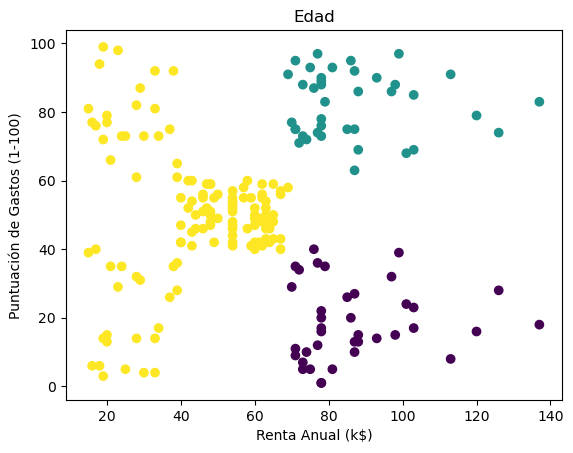

In [33]:
plt.scatter(Datos['Annual Income (k$)'], Datos['Spending Score (1-100)'], c=Datos['Grupo'], cmap='viridis')
plt.xlabel('Renta Anual (k$)')
plt.ylabel('Puntuación de Gastos (1-100)')
plt.title('Edad')
plt.show()

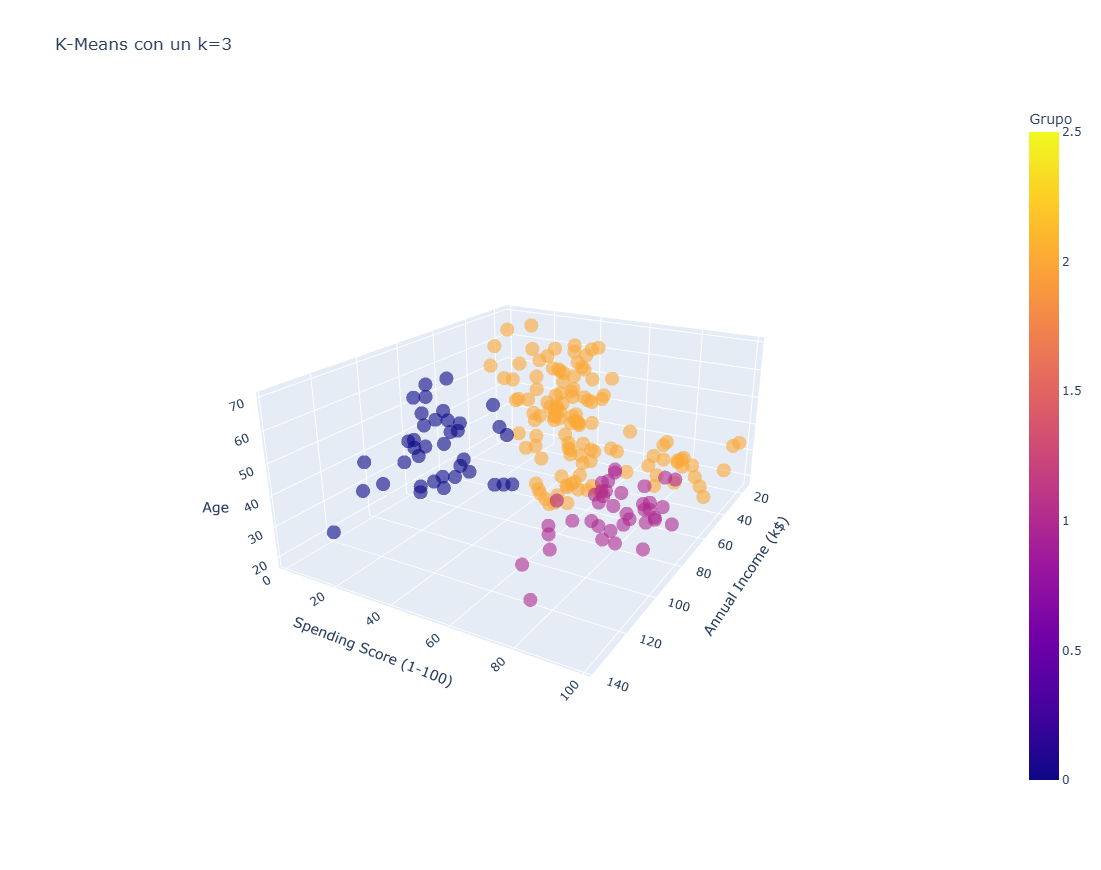

In [37]:
# Creamos un modelo 3D para una mayor visualización
Grafica_3D = px.scatter_3d(Datos, x='Annual Income (k$)', y='Spending Score (1-100)', z='Age', color='Grupo', symbol='Grupo', symbol_map={0: 'circle', 1: 'circle', 2: 'circle',}, opacity=0.6, width=980, height=870, title=f'K-Means con un k={3}', labels={'label': 'Cluster'}, color_discrete_map={})
Grafica_3D.update_layout(showlegend=False) 